In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../datasets/insurance_data.csv')
df.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


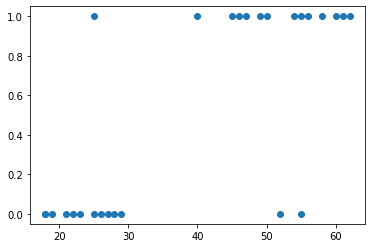

In [3]:
plt.scatter(df['age'], df['bought_insurance'])

#### Based on the above scatter plot, We can say logistic regression will be the best fir for this dataset

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['age']]
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [6]:
y = df['bought_insurance']
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = linear_model.LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model.intercept_

array([-5.38036755])

In [11]:
model.coef_

array([[0.1489143]])

In [12]:
model.score(X_train,y_train)

0.9047619047619048

In [13]:
model.predict(X_test)

array([1, 0, 1, 1, 0, 1])

In [14]:
y_test

3     0
13    0
25    1
5     1
20    0
8     1
Name: bought_insurance, dtype: int64

### Exercise

In [73]:
df = pd.read_csv('../../datasets/HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Understand your data

In [55]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
df['left'].unique()

array([1, 0])

In [18]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [19]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [20]:
df.shape

(14999, 10)

In [21]:
from pandas_profiling import ProfileReport

In [22]:
report = ProfileReport(df,title='HR_Data', explorative=True)

In [23]:
report.to_widgets()

In [24]:
report.to_file('../../datasets/HR_comma_sep.html')

In [25]:
left_emp_df = df[df.left==1]
left_emp_df.shape

(3571, 10)

In [26]:
ret_emp_df = df[df.left==0]
type(ret_emp_df)

pandas.core.frame.DataFrame

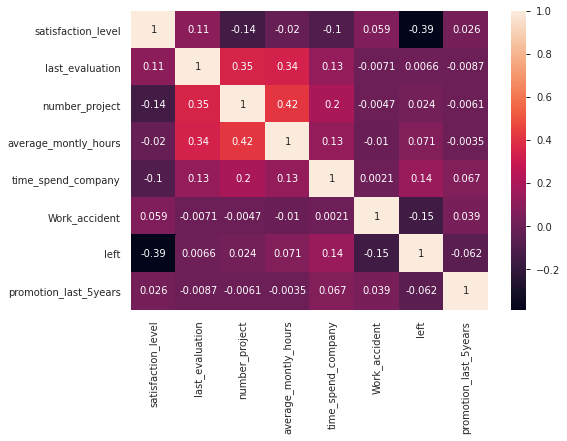

In [27]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

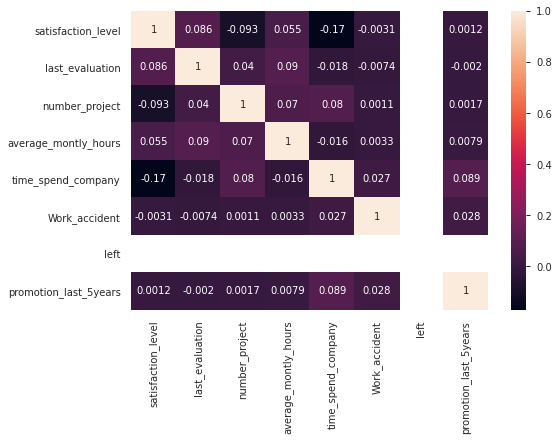

In [28]:
corr = ret_emp_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

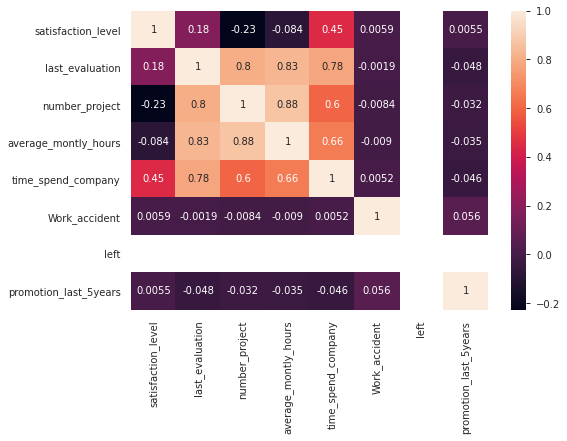

In [29]:
corr = left_emp_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

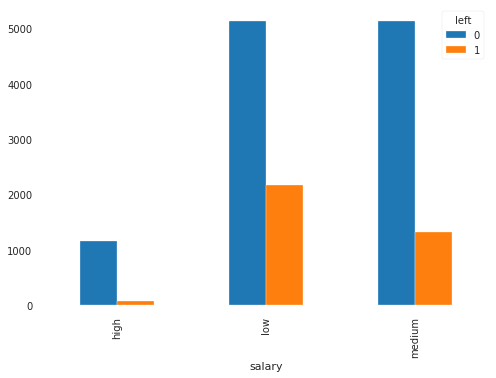

In [78]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

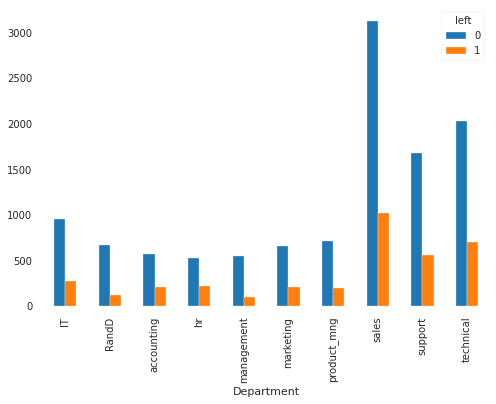

In [79]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [57]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [58]:
new_s = pd.get_dummies(df.salary, drop_first=True)
new_s

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [59]:
df.drop(['salary'], axis=1, inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,sales
1,0.80,0.86,5,262,6,0,1,0,sales
2,0.11,0.88,7,272,4,0,1,0,sales
3,0.72,0.87,5,223,5,0,1,0,sales
4,0.37,0.52,2,159,3,0,1,0,sales
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support
14995,0.37,0.48,2,160,3,0,1,0,support
14996,0.37,0.53,2,143,3,0,1,0,support
14997,0.11,0.96,6,280,4,0,1,0,support


In [60]:
df = pd.concat([df, new_s], axis=1)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0


In [61]:
X = df[['last_evaluation','average_montly_hours','promotion_last_5years', 'low', 'medium']]

In [62]:
y= df.left

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_test, y_test)

/home/rameshbabug/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model.score(X_test, y_test)

0.7603333333333333